[ 0  1  2  3  4  5  6  7  8  9 10] [  0   1   4   9  16  25  36  49  64  81 100]


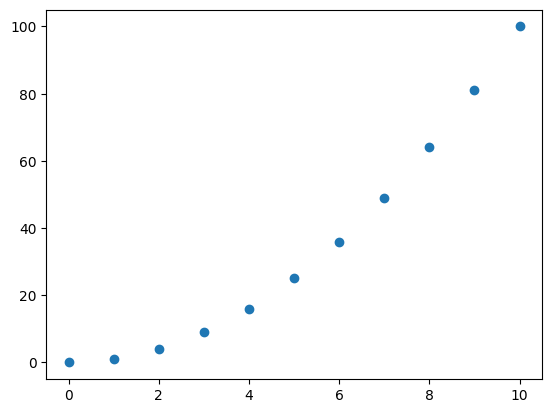

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(11)
y = x**2
print(x, y)
plt.scatter(x, y)

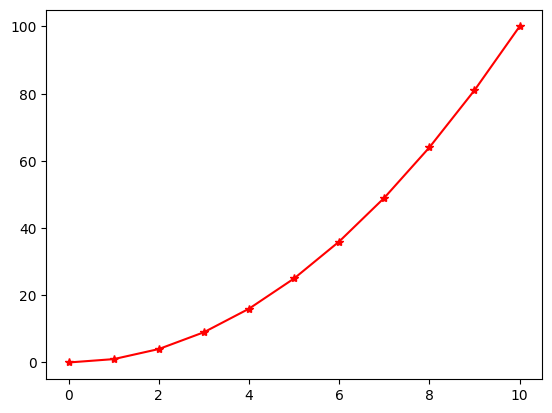

In [ ]:
plt.plot(x,y, 'r-*')

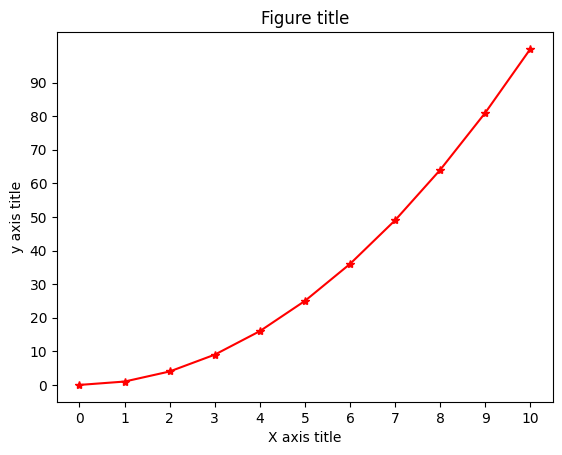

In [ ]:
plt.plot(x,y, 'r-*')

plt.xlabel('X axis title')
plt.ylabel('y axis title')
plt.title("Figure title")
plt.xticks(range(0, 11))
plt.yticks(range(0, 100, 10))
plt.show()

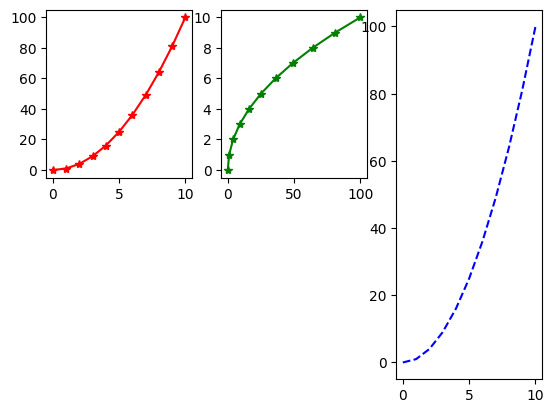

In [ ]:
plt.subplot(2, 3, 1)
plt.plot(x, y, 'r-*')


plt.subplot(2, 3, 2)
plt.plot(y, x, 'g-*')


plt.subplot(1, 3, 3)
plt.plot(x, y, 'b--')

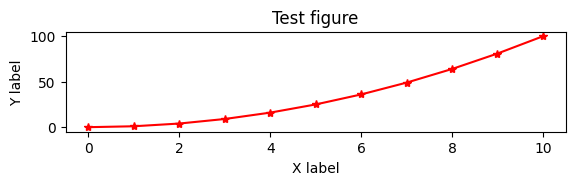

In [ ]:
fig = plt.figure(figsize=(10,5))

#[left, bottom, width, height]
axes = fig.add_axes([0.3, 0.5, 0.5, 0.2])

axes.plot(x, y, 'r-*')
axes.set_xlabel("X label")
axes.set_ylabel("Y label")
axes.set_title("Test figure")

fig.savefig("graph.pdf", dpi=200)

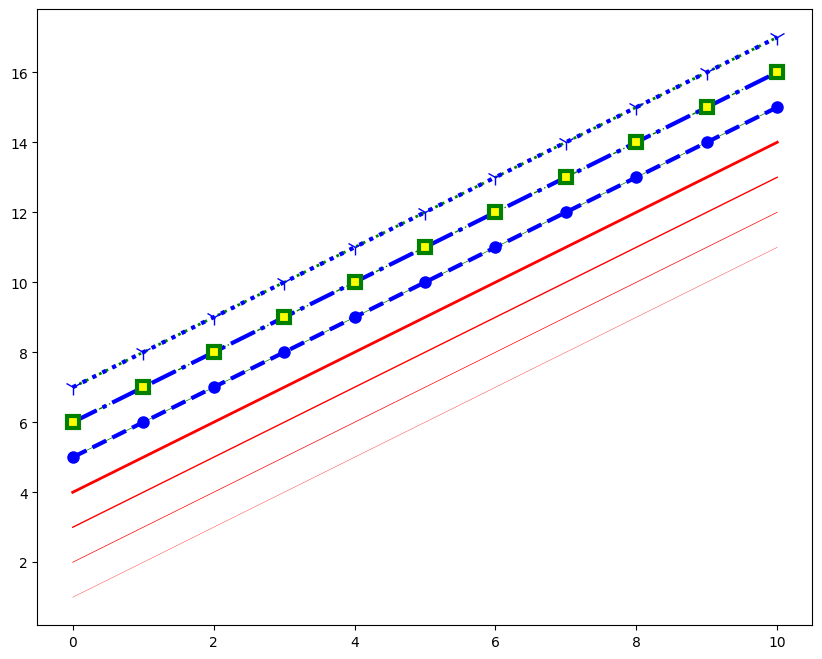

In [ ]:
fig, axes = plt.subplots(figsize=(10,8))

axes.plot(x, x+1, color="red", linewidth=0.25 )
axes.plot(x, x+2, color="red", linewidth=0.50 )
axes.plot(x, x+3, color="red", linewidth=1.00 )
axes.plot(x, x+4, color="red", linewidth=2.00 )

axes.plot(x, x+5, color="green", lw=0.50, linestyle = '-' )
axes.plot(x, x+6, color="green", lw=1.00, ls='-.' )
axes.plot(x, x+7, color="green", lw=2.00, ls=':' )

axes.plot(x, x+5, color="blue", lw=3, linestyle = '--', marker='o', markersize=8 )
axes.plot(x, x+6, color="blue", lw=3, ls='-.', marker='s', markersize=8, markerfacecolor="yellow",
         markeredgecolor="green", markeredgewidth=3)
axes.plot(x, x+7, color="blue", lw=3, ls=':', marker='1', markersize=12 )

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# 📊 Step 1: Mock Data Creation
# ------------------------

np.random.seed(42)  # reproducibility

districts = ['Downtown', 'East Side', 'West End', 'Northville', 'Southtown']
complaint_types = ['Power Cut', 'Trafic', 'Traffick', 'Noise', 'Garbage', 'Water Leak', 'Power Cut', 'Ice Cream Cart']
ice_cream_flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Mint', 'Mango', 'Lemon', 'Pistachio', 'Cookie Dough', 'Coffee', 'Blueberry']

n_rows = 500

data = {
    'district': np.random.choice(districts, size=n_rows),
    'complaint_type': np.random.choice(complaint_types, size=n_rows),
    'temperature': np.random.normal(loc=32, scale=5, size=n_rows),
    'electricity_usage': np.random.normal(loc=250, scale=50, size=n_rows),
    'num_ice_cream_carts': np.random.choice([0, 1, 2, 5, 10, 10, 10], size=n_rows),
    'survey_rating': np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_rows),
}

df = pd.DataFrame(data)

In [ ]:
df.head()

In [ ]:
df.loc[5:10, 'complaint_type']= np.nan
df = pd.concat([df, df.iloc[0:5]])

In [ ]:
df.head()

In [ ]:
df.shape

(500, 6)

In [ ]:
print(df.isnull().sum())

district                0
complaint_type          0
temperature             0
electricity_usage       0
num_ice_cream_carts     0
survey_rating          78
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.dtypes)

district                object
complaint_type          object
temperature            float64
electricity_usage      float64
num_ice_cream_carts      int64
survey_rating          float64
dtype: object


In [ ]:
print(df['district'].value_counts())

district
Northville    112
Downtown      109
East Side      95
Southtown      93
West End       91
Name: count, dtype: int64


In [ ]:
complaints_per_distrit = df. groupby('district')['complaint_type'].count()
print(complaints_per_distrit)

district
Downtown      109
East Side      95
Northville    112
Southtown      93
West End       91
Name: complaint_type, dtype: int64


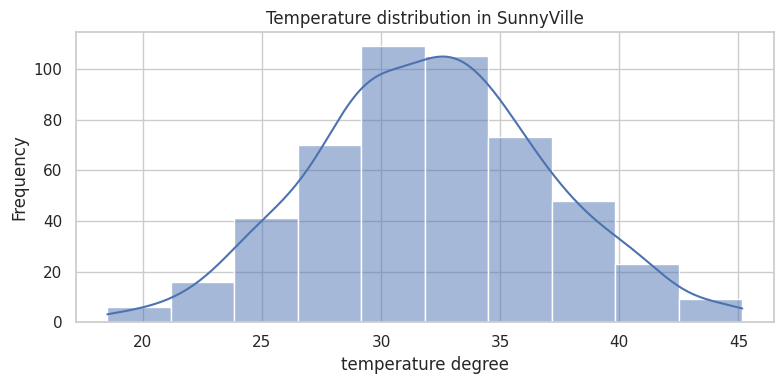

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(df['temperature'], kde=True, bins=10)
plt.title("Temperature distribution in SunnyVille")
plt.xlabel("temperature degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

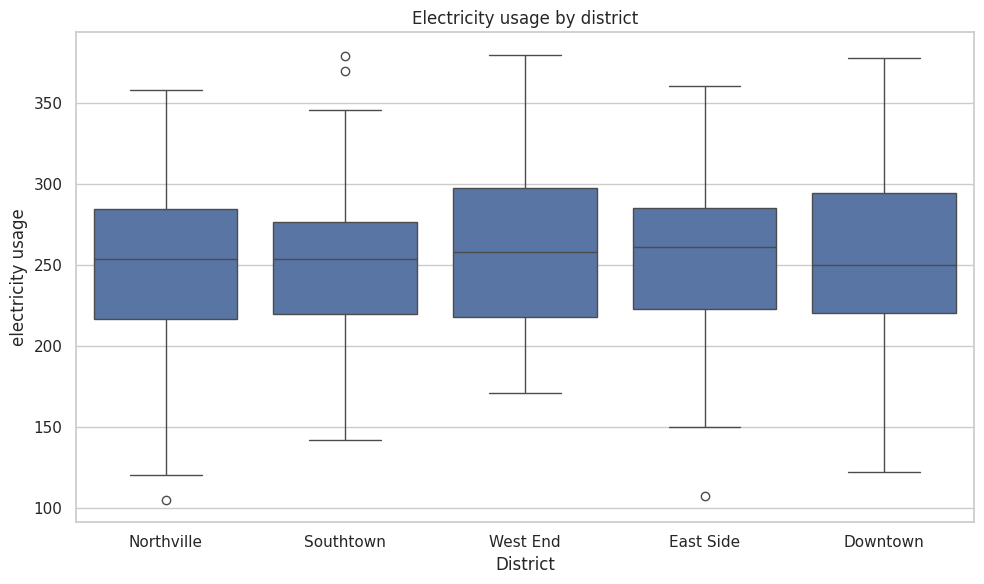

In [ ]:
plt.figure(figsize=(10,6))

sns.boxplot(x='district', y='electricity_usage', data=df)
plt.title("Electricity usage by district")
plt.xlabel("District")
plt.ylabel("electricity usage")
plt.tight_layout()
plt.show()

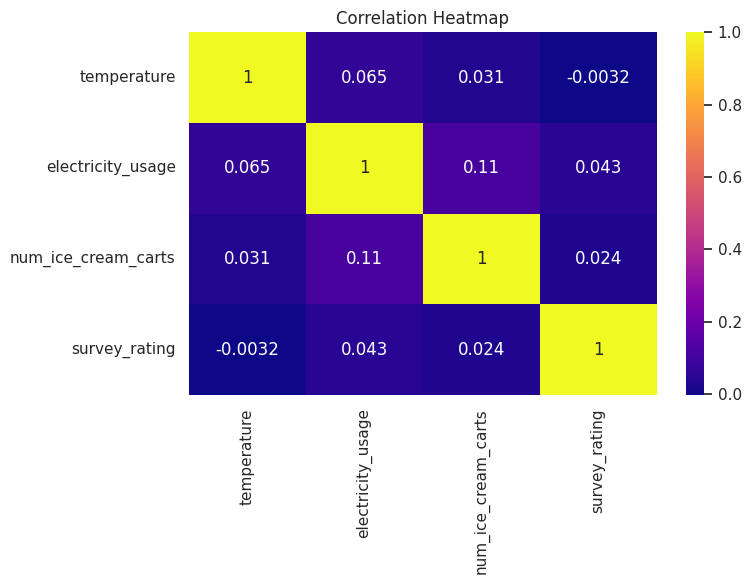

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="plasma")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

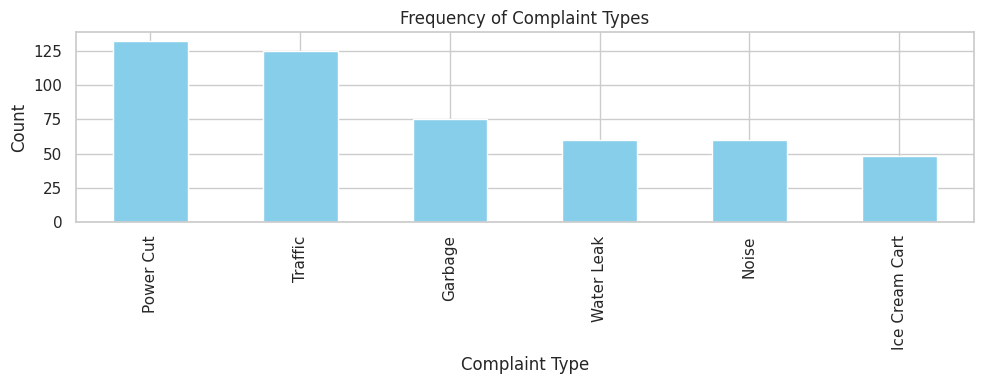

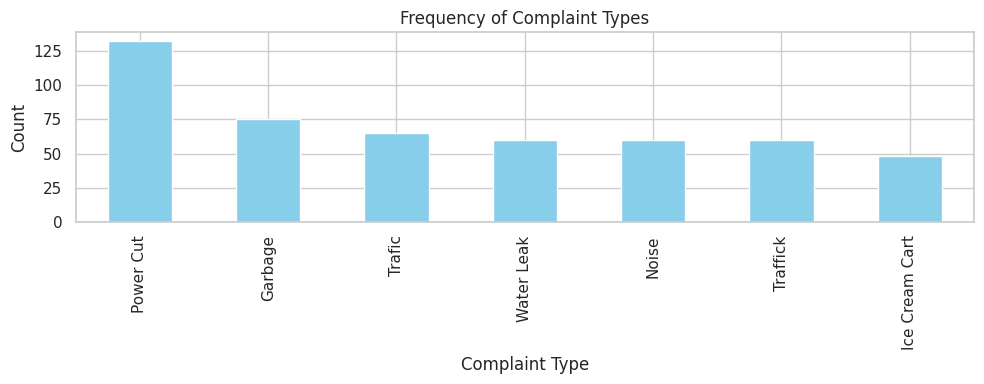

In [ ]:
# Bar Chart: Complaint Types (fixed typos)
df['complaint_type_clean'] = df['complaint_type'].replace({
    'Trafic': 'Traffic',
    'Traffick': 'Traffic'
})
plt.figure(figsize=(10, 4))
df['complaint_type_clean'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frequency of Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
df['complaint_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frequency of Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()